In [441]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [442]:
sdf = pd.read_csv("data/test_result.csv", dtype=float)
sdf.head()

,dim,p1,p2,p4
0,2.0,4.070000e-05,0.000054,NaN
1,2.0,1.130000e-06,0.000005,NaN
2,2.0,6.670000e-07,0.000004,NaN
3,2.0,7.140000e-07,0.000011,NaN
4,2.0,7.090000e-07,0.000003,NaN


In [443]:
first = sdf[sdf.columns[0]].unique()

In [444]:
other = []
for j in range(1, len(sdf.columns)):
    subother = []
    for i in range(len(sdf[sdf.columns[j]]) // 5):
        if not sdf[sdf.columns[j]][i*5]:
            subother.append(sdf[sdf.columns[j]][i*5])
        else:
            subother.append(np.mean(sdf[sdf.columns[j]][i*5:i*5+5]))
    other.append(subother)

In [445]:
df = pd.DataFrame(np.array([other[0], other[1], other[2]]).transpose(), index=first, columns=sdf.columns[1:])
df.head()

,p1,p2,p4
2.0,8.784000e-06,0.000015,NaN
3.0,9.856000e-07,NaN,NaN
4.0,1.462000e-06,0.000004,0.000034
5.0,2.274000e-06,NaN,NaN
6.0,3.362000e-06,0.000003,NaN


In [446]:
idx1 = (~df[df.columns[1]].isna())
idx2 = (~df[df.columns[2]].isna())

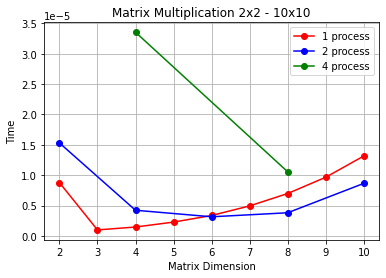

In [447]:
fig, ax = plt.subplots()
ax.set_title("Matrix Multiplication 2x2 - 10x10")
ax.set_ylabel("Time")
ax.set_xlabel("Matrix Dimension")
ax.grid()

ax.plot(df[df.columns[0]][:10].index, df[df.columns[0]][:10], 'o-r')
ax.plot(df[df.columns[1]][idx1][:10].index, df[df.columns[1]][idx1][:10], 'o-b')
ax.plot(df[df.columns[2]][idx2][:10].index, df[df.columns[2]][idx2][:10], 'o-g')

ax.legend(["1 process", "2 process", "4 process"])

plt.show()

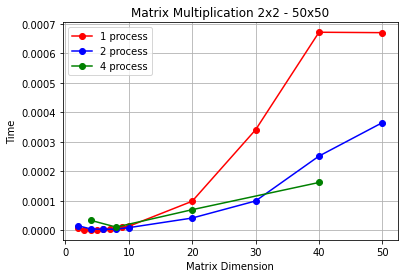

In [448]:
fig, ax = plt.subplots()
ax.set_title("Matrix Multiplication 2x2 - 50x50")
ax.set_ylabel("Time")
ax.set_xlabel("Matrix Dimension")
ax.grid()

plt.plot(df[df.columns[0]][:50].index, df[df.columns[0]][:50], 'o-r')
plt.plot(df[df.columns[1]][idx1][:50].index, df[df.columns[1]][idx1][:50], 'o-b')
plt.plot(df[df.columns[2]][idx2][:50].index, df[df.columns[2]][idx2][:50], 'o-g')

ax.legend(["1 process", "2 process", "4 process"])

plt.show()

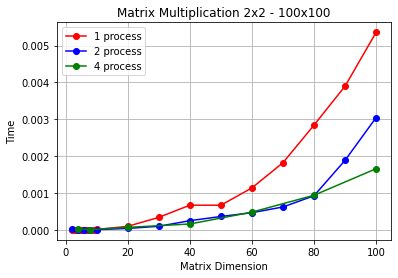

In [449]:
fig, ax = plt.subplots()
ax.set_title("Matrix Multiplication 2x2 - 100x100")
ax.set_ylabel("Time")
ax.set_xlabel("Matrix Dimension")
ax.grid()

plt.plot(df[df.columns[0]][:100].index, df[df.columns[0]][:100], 'o-r')
plt.plot(df[df.columns[1]][idx1][:100].index, df[df.columns[1]][idx1][:100], 'o-b')
plt.plot(df[df.columns[2]][idx2][:100].index, df[df.columns[2]][idx2][:100], 'o-g')

ax.legend(["1 process", "2 process", "4 process"])

plt.show()

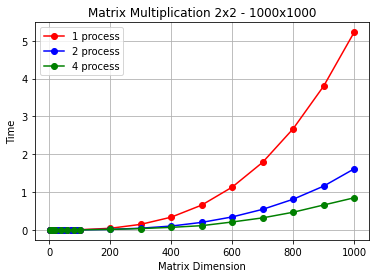

In [450]:
fig, ax = plt.subplots()
ax.set_title("Matrix Multiplication 2x2 - 1000x1000")
ax.set_ylabel("Time")
ax.set_xlabel("Matrix Dimension")
ax.grid()

plt.plot(df[df.columns[0]].index, df[df.columns[0]], 'o-r')
plt.plot(df[df.columns[1]][idx1].index, df[df.columns[1]][idx1], 'o-b')
plt.plot(df[df.columns[2]][idx2].index, df[df.columns[2]][idx2], 'o-g')

ax.legend(["1 process", "2 process", "4 process"])

plt.show()
